In [1]:
%pylab inline
import sys
sys.path.append('..\..')
from genx import api
from genx.bumps_interface import NBMonitor

Populating the interactive namespace from numpy and matplotlib
'Plugin' object has no attribute 'data'


In [2]:
import warnings

from bumps.fitters import LevenbergMarquardtFit, DEFit, fit, FIT_ACTIVE_IDS
from bumps.dream.views import *

warnings.filterwarnings('ignore')

## Load a GenX project and run a fit with bumps
See https://bumps.readthedocs.io/en/latest/api/fitters.html for fitter parameters

In [3]:
model,optimizer=api.load('D17_TOF_SiO.hgx')
model.compile_script()
print(FIT_ACTIVE_IDS)

['amoeba', 'de', 'dream', 'newton', 'lm', 'mp']


### Try to fit with Levenberg-Marquard (will find next local minimum)

In [4]:
bproblem=model.bumps_problem() # only needed if NBMonitor is used
res=model.bumps_fit(method='lm', steps=250, problem=bproblem)
res.x

array([1.34962183e+03, 3.41114891e-02, 5.90315587e+00, 9.99989323e+00])

### Fit with Differential Evolution (de)

In [5]:
bproblem=model.bumps_problem() # only needed if NBMonitor is used
res=model.bumps_fit(method='de', steps=250, pop=15, monitors=[NBMonitor(bproblem)], problem=bproblem)
res.x

array([1.24309978e+03, 3.44346258e-02, 4.59102548e+00, 8.58026376e+00])

### Run already fitted model with MCMC method to get error statistics

In [6]:
res=model.bumps_fit(method='dream',  pop=15, samples=1e5, burn=100, thin=1, alpha=0, outliers='none', 
                         trim=False, monitors=[NBMonitor(bproblem)], problem=bproblem)

# steps: 1667, # draws: 100020


              Parameter       mean  median    best [   68% interval] [   95% interval]
 1       SiliconOxide_D 1243.10(15) 1243.101 1243.100 [1242.95 1243.25] [1242.80 1243.40]
 2    SiliconOxide_Dens 0.034434(12) 0.0344344 0.0344346 [0.034422 0.034446] [0.034410 0.034458]
 3   SiliconOxide_Sigma   4.59(13)   4.589   4.591 [   4.46    4.72] [   4.34    4.84]
 4            Sub_Sigma   8.57(29)   8.567   8.580 [   8.28    8.85] [   7.99    9.13]

Statistics and plots based on 100260 samples (100.0% of total samples drawn)


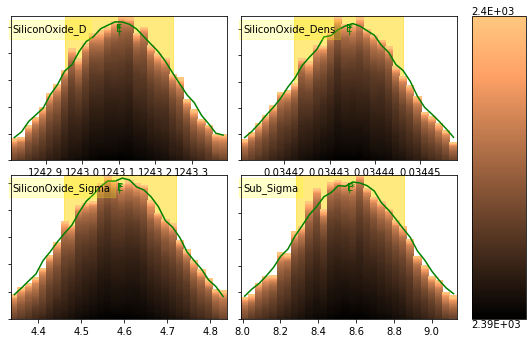

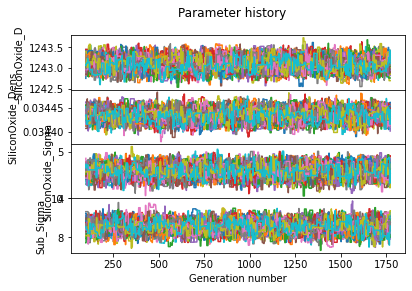

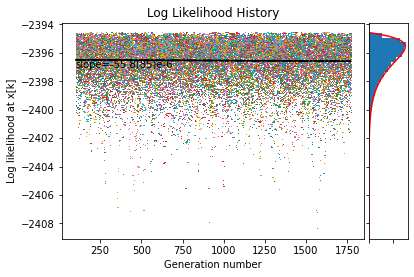

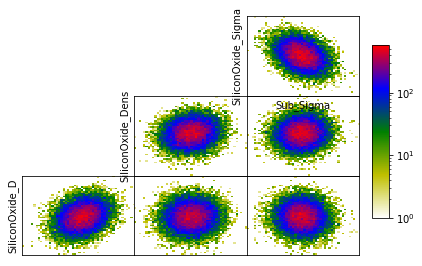

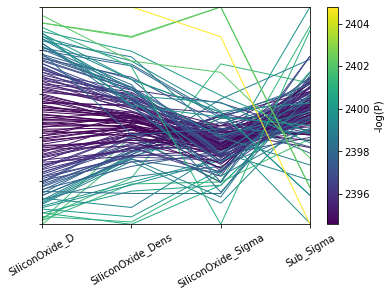

In [7]:
plot_all(res.state)

### Update the model with resulting parameters

Genx Model - compiled
File: C:\Users\Artur\genx\genx\genx\examples\D17_TOF_SiO.hgx
Parameters:
           Parameter        Value            Fit              Min              Max              Error           
           SiliconOxide.setDens 0.03443462576543913 True             0.0170754        0.0683016        -               
           SiliconOxide.setD 1243.0997781165065 True             675.0            2700.0           -               
           SiliconOxide.setSigma 4.591025475332473 True             2.5              10.0             -               
           Sub.setSigma     8.58026376090288 True             2.5              10.0             -               
DataList([
           DataSet(name=Name           , show=True, use=True, error=True),
           ])
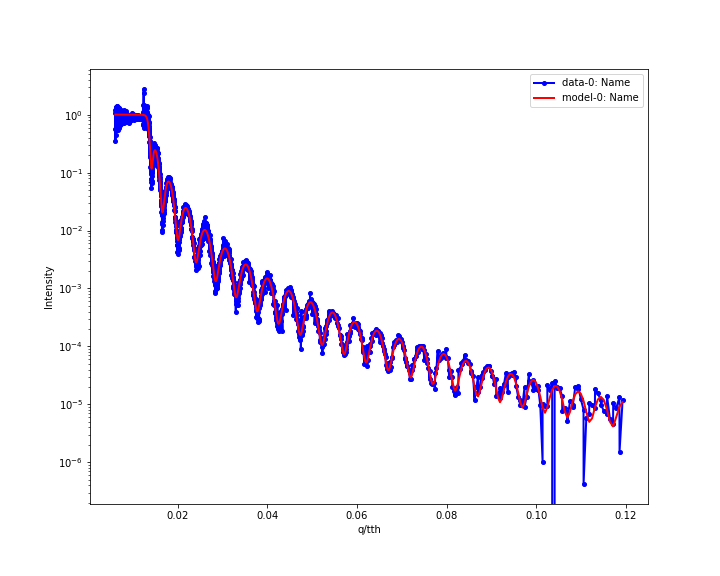

In [8]:
model.bumps_update_parameters(res)
model.simulate()
model